### Übung 7

In [1]:
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import scipy.io
import networkx as nx


def print_divider(separator='-', length=80):
    print(''.join([separator for _ in range(length)]))
    print()
    
def print_heading(msg='', separator='-'):
    print(msg)
    print_divider(separator=separator, length=len(msg))

#### Laden der Matlab Daten

In [2]:
# https://docs.scipy.org/doc/scipy/reference/tutorial/io.html
mat = scipy.io.loadmat('matrix.mat')

print('loadmat:\n%s' % str(mat))

# 'A': <4039x4039 sparse matrix of type '<class 'numpy.float64'>'
# with 176468 stored elements in Compressed Sparse Column format>
sparse_matrix = mat['A']

print('\nShape:\n%s' % str(sparse_matrix.shape))
print('\nType:\n%s' % type(sparse_matrix))
print('\nSparse Matrix:\n%s' % sparse_matrix)
print('\nCoordinate Matrix:\n%s' % sparse_matrix.tocoo())

loadmat:
{'__version__': '1.0', '__globals__': [], '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jan 11 10:56:22 2016', 'A': <4039x4039 sparse matrix of type '<class 'numpy.float64'>'
	with 176468 stored elements in Compressed Sparse Column format>}

Shape:
(4039, 4039)

Type:
<class 'scipy.sparse.csc.csc_matrix'>

Sparse Matrix:
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  (25, 0)	1.0
  :	:
  (4027, 4031)	1.0
  (4038, 4031)	1.0
  (3980, 4032)	1.0
  (4027, 4032)	1.0
  (3980, 4033)	1.0
  (3986, 4033)	1.0
  (4000, 4033)	1.0
  (3980, 4034)	1.0
  (4023, 4034)	1.0
  (3980, 4035)	1.0
  (3980, 4036)	1.0
  (3999, 4036)	1.0
  (3980, 4037)	1.0
  (3982, 4037)	1.0
  (4014, 4037)	1.0
  (4020, 40

#### Darstellung in einer Adjazenzmatrix

*Zur Erinnerung*, innerhalb einer Adjazenzmatrix wird für jede Kante zwischen zwei Knoten eine 1 eingetragen, ansonsten eine 0. 

In der folgenden Grafik sind einige große Rechtecke zu sehen. D.h. dass es in der Matrix einige Bereiche gibt in denen die Knoten stark untereinander verbunden sind. In den jeweiligen Ecken befinden sich wenige Knoten, die eine "Verbindung" zum nächsten Bereich besitzen. Das bedeutet, dass es in dem zu Grunde liegenden Graph einige wenige Knoten gibt, die als Verbindungsstück zu einem anderen Bereich fungieren. Tendenziell wird viel Datenverkehr über diese Knoten laufen, wenn Knoten aus unterschiedlichen Bereichen miteinander kommunizieren wollen. Diese Knoten sind ein Nadelöhr im gesamten Graph. Wenn Sie wegfallen entstehen einzelne Inseln die untereinander nicht kommunizieren können. 

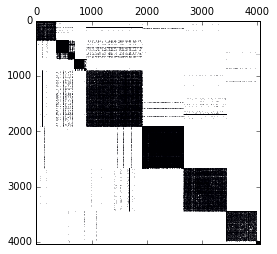

In [3]:
# http://stackoverflow.com/questions/18651869/scipy-equivalent-for-matlab-spy
pl.spy(sparse_matrix, precision=0.01, markersize=.1)
pl.show()

In [4]:
# https://jakevdp.github.io/blog/2012/10/14/scipy-sparse-graph-module-word-ladders/
# from scipy.sparse import csgraph

# bft = csgraph.breadth_first_tree(sparse_matrix, 0, directed=False)
# print(bft)

graph = nx.from_scipy_sparse_matrix(sparse_matrix, create_using=nx.MultiGraph())

#### Darstellung als Graph

Im folgenden Graph sind die einzelnen Inseln ganz gut zu erkennen.

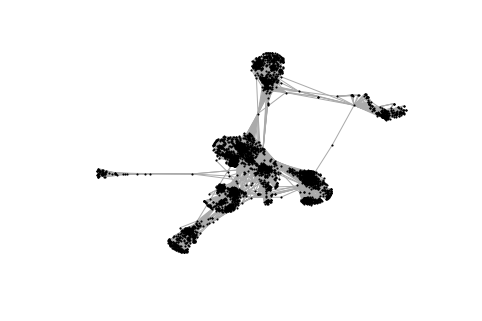

In [5]:
nx.draw(graph, node_shape='.', node_size=5, node_color='#000000', edge_color='#aaaaaa')
plt.show()

In [6]:
# nodes – Dictionary of nodes with betweenness centrality as the value.
# http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality
#nodes = nx.betweenness_centrality(graph)
#print(nodes)

#### ``nx.dfs_successors``

In den Aufgaben wird als Wurzel immer die ``42`` verwendet. Über die Funktion ``nx.dfs_successors`` wird aus dem ursprünglichen ungereichteten ``nx.MultiGraph`` ein gerichteter ``nx.DiGraph`` erzeugt. Die der Wurzel folgenden Knoten usw. enthalten deren Nachfolger nach ``depth first search``-Mechanik. Die Datenstruktur ist ein ``dict`` mit den Ids der Knoten und einer Liste der Nachfolger.

In [7]:
root_id = 42
print_heading('Wurzel %d' % root_id, separator='=')
print('Nachbarn: %s\n' % nx.neighbors(graph, root_id))
print_heading('``nx.dfs_successors`` der Wurzel')
node = nx.dfs_successors(graph, root_id)
for _id in sorted(node.keys()):
    print('        id: %d' % _id)
    print('successors: %s' % node[_id])

Wurzel 42

Nachbarn: [0, 33]

``nx.dfs_successors`` der Wurzel
--------------------------------

        id: 0
successors: [1, 11, 12, 15, 18, 33, 37, 43, 74, 90, 114, 209, 210, 215, 233, 244, 287, 292, 335]
        id: 1
successors: [194]
        id: 2
successors: [226]
        id: 3
successors: [228]
        id: 4
successors: [181]
        id: 5
successors: [316, 169]
        id: 6
successors: [219, 95]
        id: 7
successors: [291]
        id: 8
successors: [193]
        id: 9
successors: [258]
        id: 10
successors: [323]
        id: 13
successors: [172]
        id: 14
successors: [310]
        id: 16
successors: [82]
        id: 17
successors: [214]
        id: 19
successors: [289, 293, 138, 89]
        id: 20
successors: [162]
        id: 21
successors: [281]
        id: 22
successors: [347, 185]
        id: 23
successors: [99, 267, 245, 155, 190]
        id: 24
successors: [180]
        id: 25
successors: [141]
        id: 26
successors: [276]
        id: 28
successors: [1

#### ``nx.dfs_tree``

Im Gegensatz zu ``nx.dfs_successors`` liefert diese Methode kein ``dict`` sondern den eigentlichen Graphen. Wichtige Methoden zu Analyse sind an dieser Stelle:

- ``G.nodes()``
- ``G.edges()``

``nodes`` liefert alle Knoten des Graphen. ``edges`` liefert alle Kanten. Natürlich kann der Fall eintreten, dass ausgehend von einem Knoten keine weitere Verbindung zu anderen Knoten existiert, da es sich um einen gerichteten Graphen handelt. Sollte also eine Analyse der Nachbarn erfolgen (``nx.neighbors(graph, node``) muss diese Analyse auf dem ursprünglich geladenen Graphen erfolgen.

In [8]:
dfs_tree = nx.dfs_tree(graph, 42)
print_heading('Knoten des Baums der Tiefensuche')
print(dfs_tree.nodes())

Knoten des Baums der Tiefensuche
--------------------------------

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 20

In [9]:
root_id = 42
dfs_tree = nx.dfs_tree(graph, root_id)
edges = dfs_tree.edges()

print_heading('Kanten des Baums der Tiefensuche')
for edge in edges:
    print(edge)

Kanten des Baums der Tiefensuche
--------------------------------

(0, 1)
(0, 11)
(0, 292)
(0, 37)
(0, 33)
(0, 210)
(0, 233)
(0, 74)
(0, 43)
(0, 12)
(0, 18)
(0, 15)
(0, 209)
(0, 114)
(0, 244)
(0, 215)
(0, 90)
(0, 335)
(0, 287)
(1, 194)
(2, 226)
(3, 228)
(4, 181)
(5, 169)
(5, 316)
(6, 219)
(6, 95)
(7, 291)
(8, 193)
(9, 258)
(10, 323)
(13, 172)
(14, 310)
(16, 82)
(17, 214)
(19, 289)
(19, 138)
(19, 293)
(19, 89)
(20, 162)
(21, 281)
(22, 185)
(22, 347)
(23, 267)
(23, 99)
(23, 155)
(23, 245)
(23, 190)
(24, 180)
(25, 141)
(26, 276)
(28, 149)
(29, 16)
(29, 247)
(31, 237)
(32, 337)
(36, 197)
(38, 178)
(39, 105)
(40, 272)
(41, 140)
(42, 0)
(44, 20)
(45, 221)
(48, 330)
(49, 241)
(49, 255)
(51, 84)
(53, 24)
(53, 88)
(53, 317)
(53, 191)
(54, 27)
(55, 122)
(56, 298)
(56, 207)
(56, 30)
(56, 55)
(57, 302)
(58, 2885)
(59, 250)
(59, 238)
(62, 318)
(64, 100)
(65, 7)
(66, 334)
(67, 128)
(68, 263)
(69, 121)
(72, 26)
(73, 126)
(75, 85)
(77, 117)
(77, 294)
(80, 266)
(80, 173)
(81, 286)
(82, 211)
(83, 51)
(8

#### Zähler der Nachbarn

Die folgende Methode dient zum Zählen der Nachbarn, wenn der Graph rekursiv durchgegangen wird.

In [10]:
neighbor_count = 0
def neighbor_counter(node, debug=False):
    global neighbor_count
    if debug:
        print('node {:5d}, neighbors: {:5d}'.format(node, len(nx.neighbors(graph, node))))
    neighbor_count += len(nx.neighbors(graph, node))

#### Limit der Rekursionstiefe

Zum aktuellen Zeitpunkt ist der Standardwert der Rekursionstiefe auf 1000 begrenzt. In der folgenden Beispielen wird eine höhere Tiefe erforderlich.

In [11]:
import sys
sys.setrecursionlimit(2000)

### Aufgabe 7.1.1 Crawlen unstrukturierter Netze

#### Ermittlung der mittleren Knotengrade

In [12]:
from datetime import datetime

root_id = 42
max_visits = (100, 200, 400, 800, 1600)

def timed(func):
    start = datetime.now()
    def wrapper(*args, **kwargs):
        func(*args, **kwargs)
        end = datetime.now()
        print('  Dauer: %s' % str(end - start), end='\n\n')
    return wrapper

In [13]:
def crawl_dfs(edges: list, node: int, max_visits: int, S: set, callback):
    """Crawlt einen Graph anhand seiner Kanten mit Hilfe von
    depth first search in rekursiver Variante.
    
    :param edges: Liste mit 2-Tupeln, die alle Kanten des Graphen beinhalten
    :param node: Id des Ausgangsknotens
    :param max_visits: Anzahl der maximal zu besuchenden Knoten
    :param S: Menge an Knoten, die bereits besucht wurden
    :param callback: Funktion mit einem Parameter, der bei Aufruf
        den besuchten Knoten enthält
    """
    S.add(node)
    callback(node)
    neighbors = [e[1] for e in edges if e[0] == node]
    for neighbor in neighbors:
        if neighbor not in S and len(S) < max_visits:
            crawl_dfs(edges, neighbor, max_visits, S, callback)


print_heading('Crawl des Graphs über Tiefensuche')

g = nx.dfs_tree(graph, root_id)
edges = g.edges()

@timed
def timed_crawl_dfs(max_visits):
    global neighbor_count
    neighbor_count = 0
    crawl_dfs(edges, root_id, max_visits=count, S=set(), callback=neighbor_counter)
    print('Knotengrad {:.4f} bei {:5d} besuchten Knoten'.format((neighbor_count / count), count))
    
for count in max_visits:
    timed_crawl_dfs(count)

Crawl des Graphs über Tiefensuche
---------------------------------

Knotengrad 83.6400 bei   100 besuchten Knoten
  Dauer: 0:00:00.451427

Knotengrad 97.7700 bei   200 besuchten Knoten
  Dauer: 0:00:01.382644

Knotengrad 58.0325 bei   400 besuchten Knoten
  Dauer: 0:00:03.212998

Knotengrad 51.1525 bei   800 besuchten Knoten
  Dauer: 0:00:06.866726

Knotengrad 48.5519 bei  1600 besuchten Knoten
  Dauer: 0:00:14.334678



In [14]:
def crawl_dfs_iter(edges, root, max_visits=10):
    """Generator der einen Graph anhand seiner Kanten mit Hilfe von
    depth first search in iterativer Variante crawlt. Die Id des
    besuchten Knoten wird dabei geliefert.
    
    :param edges: Liste mit 2-Tupeln, die alle Kanten des Graphen beinhalten
    :param root: Id des Ausgangsknotens
    :param max_visits: Anzahl der maximal zu besuchenden Knoten
    """
    visited = 0
    S = set()
    Q = [] 
    Q.append(root)
    while Q and visited < max_visits:
        
        node = Q.pop()
        yield node
        visited += 1
        if node not in S and visited < max_visits:
            S.add(node)
            neighbors = [e[1] for e in edges if e[0] == node]
            
            # umdrehen der nachbarn, damit diese in der richtigen
            # reihenfolge durch pop wieder entnommen werden
            neighbors.reverse()
            for neighbor in neighbors:
                Q.append(neighbor)

print_heading('Crawl des Graphs über iterative Tiefensuche')

g = nx.dfs_tree(graph, root_id)
edges = g.edges()

@timed
def timed_crawl_dfs_iter(max_visits):
    neighbor_count = 0
    for node in crawl_dfs_iter(edges, root_id, max_visits=count):
        # print('node {:5d}, neighbors: {:5d}'.format(node, len(nx.neighbors(graph, node))))
        neighbor_count += len(nx.neighbors(graph, node))
        
    msg = 'Knotengrad {:.4f} bei {:5d} besuchten Knoten'
    print(msg.format((neighbor_count / count), count))

for count in max_visits:
    timed_crawl_dfs_iter(count)

Crawl des Graphs über iterative Tiefensuche
-------------------------------------------

Knotengrad 83.6400 bei   100 besuchten Knoten
  Dauer: 0:00:00.445757

Knotengrad 97.7700 bei   200 besuchten Knoten
  Dauer: 0:00:01.372357

Knotengrad 58.0325 bei   400 besuchten Knoten
  Dauer: 0:00:03.256355

Knotengrad 51.1525 bei   800 besuchten Knoten
  Dauer: 0:00:06.941015

Knotengrad 48.5519 bei  1600 besuchten Knoten
  Dauer: 0:00:15.370579



In [15]:
def crawl_bfs(edges, Q=[], S=set(), max_visits=10, callback=lambda x: x):
    next_q = []
    while len(S) < max_visits:
        for node in Q:
            if node not in S and len(S) < max_visits:
                S.add(node)
                callback(node)
                neighbors = [n[1] for n in edges if n[0] == node and n[1] not in S]
                next_q += neighbors
        crawl_bfs(edges, next_q, S, max_visits, callback)
        
print_heading('Crawl des Graphs über Breitensuche')

g = nx.bfs_tree(graph, root_id)
edges = g.edges()

@timed
def timed_crawl_bfs(max_visits):
    global neighbor_count
    neighbor_count = 0

    crawl_bfs(edges, [root_id], max_visits=count, S=set(), callback=neighbor_counter)
    print('Knotengrad {:10,.4f} bei {:5d} besuchten Knoten'.format((neighbor_count / count), count))

for count in max_visits:
    timed_crawl_bfs(count)

Crawl des Graphs über Breitensuche
----------------------------------

Knotengrad    18.4600 bei   100 besuchten Knoten
  Dauer: 0:00:00.153780

Knotengrad    22.6450 bei   200 besuchten Knoten
  Dauer: 0:00:00.735418

Knotengrad    28.8450 bei   400 besuchten Knoten
  Dauer: 0:00:01.524009

Knotengrad    38.7563 bei   800 besuchten Knoten
  Dauer: 0:00:03.340879

Knotengrad    48.2881 bei  1600 besuchten Knoten
  Dauer: 0:00:06.674933



In [16]:
def crawl_bfs_iter(edges, root, max_visits=10):
    visited = 0
    # Verwendung von Q als Queue (FIFO)
    Q = []
    S = set()
    
    Q.append(root)
    S.add(root)
    
    while Q and visited < max_visits:
        node = Q.pop(0)
        yield node
        visited += 1
        neighbors = [e[1] for e in edges if e[0] == node]
        for neighbor in neighbors:
            if neighbor not in S:
                S.add(neighbor)
                Q.append(neighbor)
                
print_heading('Crawl des Graphs über iterative Breitensuche')

g = nx.bfs_tree(graph, root_id)
edges = g.edges()

@timed
def timed_crawl_bfs_iter(max_visits):
    neighbor_count = 0

    for node in crawl_bfs_iter(edges, root_id, max_visits=count):
        # print('node {:5d}, neighbors: {:5d}'.format(node, len(nx.neighbors(graph, node))))
        neighbor_count += len(nx.neighbors(graph, node))
        
    print('Knotengrad {:10,.4f} bei {:5d} besuchten Knoten'.format((neighbor_count / count), count))

for count in max_visits:
    timed_crawl_bfs_iter(count)

Crawl des Graphs über iterative Breitensuche
--------------------------------------------

Knotengrad    18.4600 bei   100 besuchten Knoten
  Dauer: 0:00:00.184289

Knotengrad    22.6450 bei   200 besuchten Knoten
  Dauer: 0:00:00.485176

Knotengrad    28.8450 bei   400 besuchten Knoten
  Dauer: 0:00:01.339144

Knotengrad    38.7563 bei   800 besuchten Knoten
  Dauer: 0:00:03.133715

Knotengrad    48.2881 bei  1600 besuchten Knoten
  Dauer: 0:00:05.835951



#### Tatsächlicher Knotengrad

Der tatsächliche mittlere Knotengrad berechnet sich auch der Summe aller Nachbarn aller Knoten des ungerichteten Graphs $g$ durch die Anzahl der Knoten.

$\dfrac{\sum_{i=0}^{n} neighbors(g[i])}{n}$

In [17]:
sum([len(nx.neighbors(graph, n)) for n in graph.nodes()]) / len(graph.nodes())

43.69101262688784

#### Plot der CCDF

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [19]:
def ecdf(values, complementary=False):
    
    # 1. sortieren der werte
    values = sorted(values)

    # 2. reduzieren der werte auf eindeutigkeit
    unique_values = sorted(list(set(values)))

    # 3. ermittlung wie viele werte <= x sind fuer jede eindeutige zeit
    cumsum_values = []
    for u in unique_values:
        cumsum_values.append((u, len([1 for _ in values if _ <= u])))

    # 4. ermittlung der prozentualen anteile wie viele werte <= x sind
    y = np.round([c / len(values) for t, c in cumsum_values], decimals=2)

    # fuer jedes eindeutige x wird ein punkt dargestellt
    if complementary:
        y = 1 - y
    plt.plot(unique_values, y, color='#e53935', linestyle=' ', marker='.')

    # von x bis x + 1 wird ein einzelner strich geplottet
    for i in range(len(unique_values)):
        x_0 = unique_values[i]
        x_1 = unique_values[i + 1] if i < len(unique_values) - 1 else unique_values[i] + 1
        plt.plot([x_0, x_1], [y[i], y[i]], color='#1e88e5', linestyle='-')

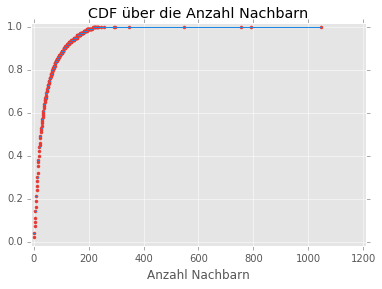

In [20]:
neighbors = [len(nx.neighbors(graph, n)) for n in graph.nodes()]

ecdf(neighbors)

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

plt.title('CDF über die Anzahl Nachbarn')
plt.xlabel('Anzahl Nachbarn')
plt.show()

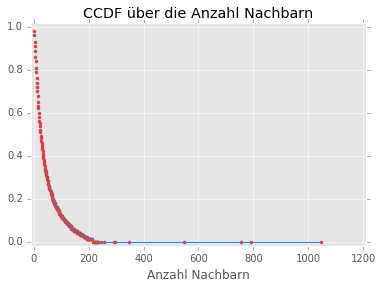

In [21]:
ecdf(neighbors, complementary=True)

x_min, x_max, y_min, y_max = plt.axis()
plt.axis((x_min - 10, x_max + 10, y_min - .02, y_max + .02))

plt.title('CCDF über die Anzahl Nachbarn')
plt.xlabel('Anzahl Nachbarn')
plt.show()